# Solving the Wholesale Customer Segmentation problem using Hierarchical Agglomerative Clustering

It contains 440 observations and 8 variable.

Attribute Information:

    1) FRESH: annual spending (m.u.) on fresh products (Continuous);
    2) MILK: annual spending (m.u.) on milk products (Continuous);
    3) GROCERY: annual spending (m.u.)on grocery products (Continuous);
    4) FROZEN: annual spending (m.u.)on frozen products (Continuous)
    5) DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)
    6) DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous);
    7) CHANNEL: customers Channel - Horeca (Hotel/Restaurant/Cafe) or Retail channel (Nominal)
    8) REGION: customers Region - Lisnon, Oporto or Other (Nominal) 

In [62]:
defaultW <- getOption("warn") 
options(warn = -1) 


#  install “package” if it doesn’t exist, and then load it.

if (!require(tidyverse)) install.packages('tidyverse')   # data manipulation
library(tidyverse)

if (!require(ggplot2)) install.packages('ggplot2')
library(ggplot2)

if (!require(GGally)) install.packages('GGally')
library("GGally")

# Cluster analysis
if (!require(cluster)) install.packages('cluster') # clustering algorithms
library(cluster)  
# Evalute Clusters
if (!require(factoextra)) install.packages('factoextra')  # clustering algorithms & visualization
library(factoextra) 

if (!require(dendextend) ) install.packages('dendextend')
library(dendextend)
suppressPackageStartupMessages(library(dendextend))

install.packages("https://cran.r-project.org/bin/windows/contrib/3.6/foreign_0.8-76.zip")

if (!require(reshape2) ) install.packages('reshape2')  # dcast(), melt()
library(reshape2)

#if (!require(quantable) ) install.packages('quantable')  # robustscale()
#library(quantable)  
package_version(R.version)

inferring 'repos = NULL' from 'pkgs'


package 'foreign' successfully unpacked and MD5 sums checked


[1] '3.6.1'

In [63]:
rawdata <- read.csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv",header=TRUE, sep=",", as.is=TRUE)

In [64]:
rawdata %>% 
    as_tibble() %>%
    head()

Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
2,3,12669,9656,7561,214,2674,1338
2,3,7057,9810,9568,1762,3293,1776
2,3,6353,8808,7684,2405,3516,7844
1,3,13265,1196,4221,6404,507,1788
2,3,22615,5410,7198,3915,1777,5185
2,3,9413,8259,5126,666,1795,1451


In [65]:
rawdata %>% str()

'data.frame':	440 obs. of  8 variables:
 $ Channel         : int  2 2 2 1 2 2 2 2 1 2 ...
 $ Region          : int  3 3 3 3 3 3 3 3 3 3 ...
 $ Fresh           : int  12669 7057 6353 13265 22615 9413 12126 7579 5963 6006 ...
 $ Milk            : int  9656 9810 8808 1196 5410 8259 3199 4956 3648 11093 ...
 $ Grocery         : int  7561 9568 7684 4221 7198 5126 6975 9426 6192 18881 ...
 $ Frozen          : int  214 1762 2405 6404 3915 666 480 1669 425 1159 ...
 $ Detergents_Paper: int  2674 3293 3516 507 1777 1795 3140 3321 1716 7425 ...
 $ Delicassen      : int  1338 1776 7844 1788 5185 1451 545 2566 750 2098 ...


In [66]:
rawdata %>% summary()

    Channel          Region          Fresh             Milk      
 Min.   :1.000   Min.   :1.000   Min.   :     3   Min.   :   55  
 1st Qu.:1.000   1st Qu.:2.000   1st Qu.:  3128   1st Qu.: 1533  
 Median :1.000   Median :3.000   Median :  8504   Median : 3627  
 Mean   :1.323   Mean   :2.543   Mean   : 12000   Mean   : 5796  
 3rd Qu.:2.000   3rd Qu.:3.000   3rd Qu.: 16934   3rd Qu.: 7190  
 Max.   :2.000   Max.   :3.000   Max.   :112151   Max.   :73498  
    Grocery          Frozen        Detergents_Paper    Delicassen     
 Min.   :    3   Min.   :   25.0   Min.   :    3.0   Min.   :    3.0  
 1st Qu.: 2153   1st Qu.:  742.2   1st Qu.:  256.8   1st Qu.:  408.2  
 Median : 4756   Median : 1526.0   Median :  816.5   Median :  965.5  
 Mean   : 7951   Mean   : 3071.9   Mean   : 2881.5   Mean   : 1524.9  
 3rd Qu.:10656   3rd Qu.: 3554.2   3rd Qu.: 3922.0   3rd Qu.: 1820.2  
 Max.   :92780   Max.   :60869.0   Max.   :40827.0   Max.   :47943.0  

### Display data

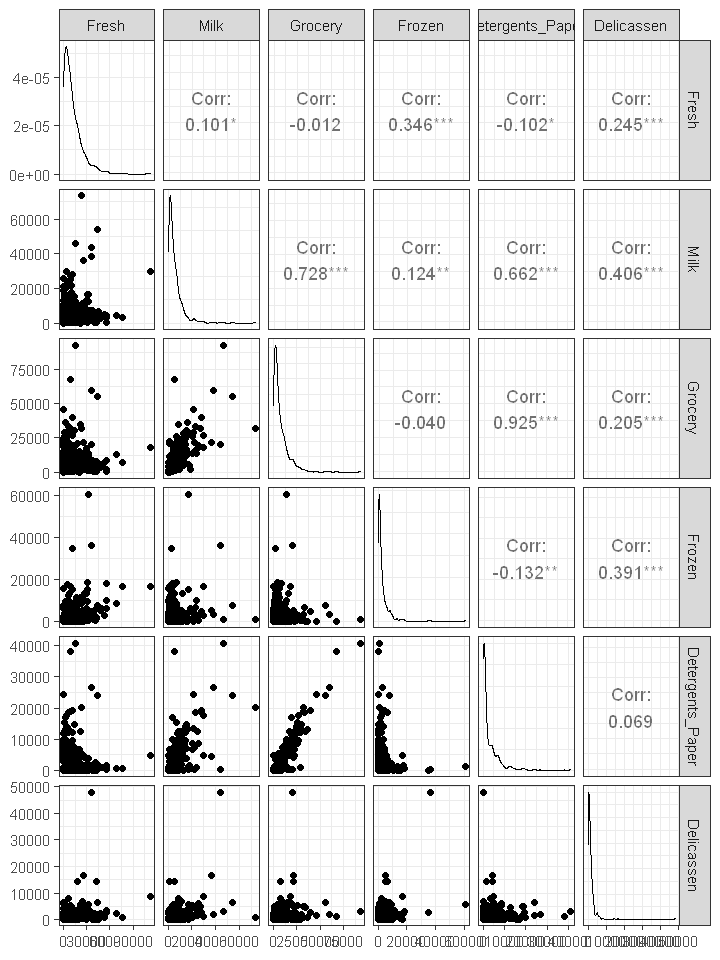

In [67]:
# remove  nominal data columns
df <- rawdata %>%
     dplyr::select(-Channel,-Region)  

# plot corr matrix
df %>% 
     ggpairs()  + 
     theme_bw()

Strong correlation is found in — Grocery & Detergents_Paper — 0.92, Milk & Detergents_Paper — 0.66 and Milk & Grocery — 0.73

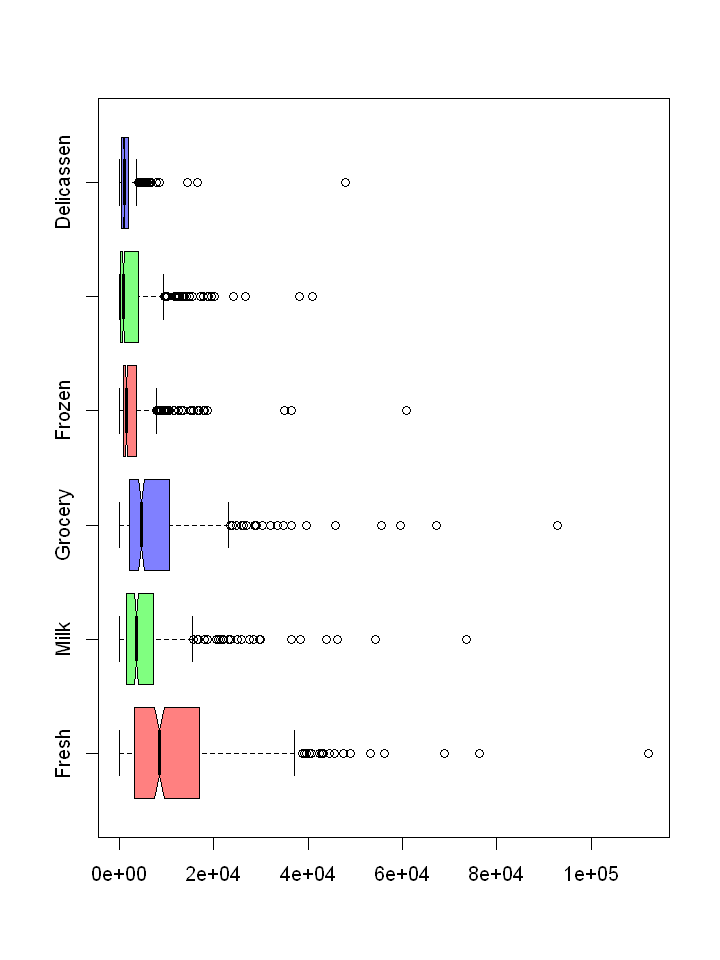

In [68]:
options(repr.plot.width=6, repr.plot.height=8, fig.align="center")
df %>% 
 boxplot( #las = 1,  # controls the orientation of the axis labels (1=horizontal) 
         horizontal = TRUE,
         notch = TRUE,  # if notches do not overlap ~ 95% confidence that medians are different 
         col = rainbow(3, s = 0.5)
            
       #  ,cex.lab=0.3          # controls the font size of the axis labels  
  )

In [69]:
# Normalize the data
X_df <- df %>%   
    apply(1,function(x){(x-min(x)) / diff(range(x))}) %>% t  # t for transpose

# Calculate clusters
hc <- X_df %>% 
    dist(method = "euclidean") %>% # Computr distance/dissimilary matrix
    hclust(method = "complete")   # Compute hierarchial clusters

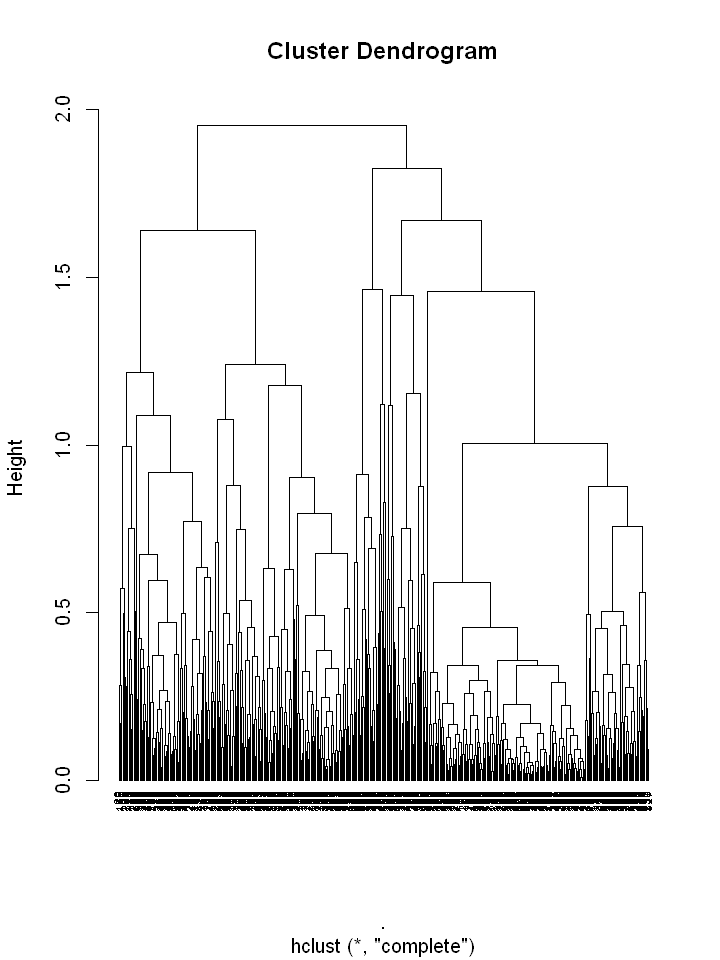

In [70]:
# Plot the obtained dendrogram

hc %>% plot(
    hang=-1, # line up names at bottom
    cex=0.6) # Make font smaller

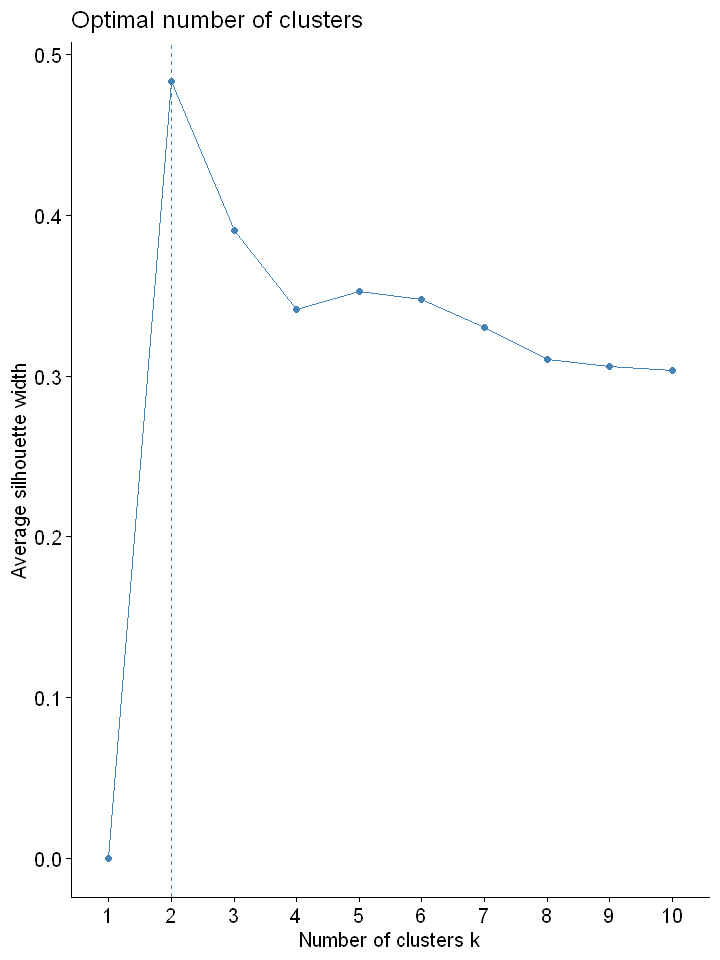

In [71]:
X_df %>%
    fviz_nbclust(FUN = hcut, method = "silhouette")

with the agnes function you can also get the agglomerative coefficient, which measures the amount of clustering structure found (values closer to 1 suggest strong clustering structure).  https://uc-r.github.io/hc_clustering

In [72]:
# Compute with agnes
hc2 <- agnes(X_df, method = "complete")

# Agglomerative coefficient
hc2$ac

[1] 0.9213463

In [73]:
# https://uc-r.github.io/hc_clustering
# This allows us to find certain hierarchical clustering methods that can identify stronger clustering structures.

# methods to assess
m <- c( "average", "single", "complete", "ward")
names(m) <- c( "average", "single", "complete", "ward.D2")

# function to compute coefficient
ac <- function(x) {
  agnes(X_df, method = x)$ac
}


map_dbl(m, ac)

average    single  complete   ward.D2 
0.8834720 0.8654471 0.9213463 0.9897535

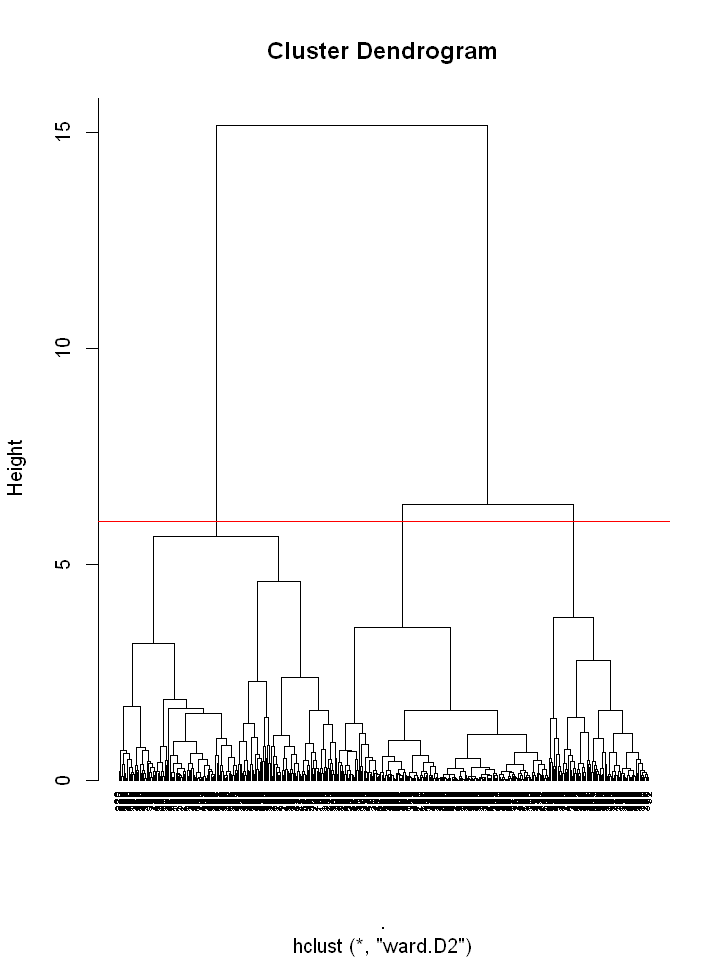

In [74]:
# using ward.D2 method
hc <- X_df %>%
    dist %>%
    hclust(method = 'ward.D2')%>% 
    plot(hang=-1,cex=0.6) %>%
    abline(h = 6, col = 'red')   # 3 clusters at h=6

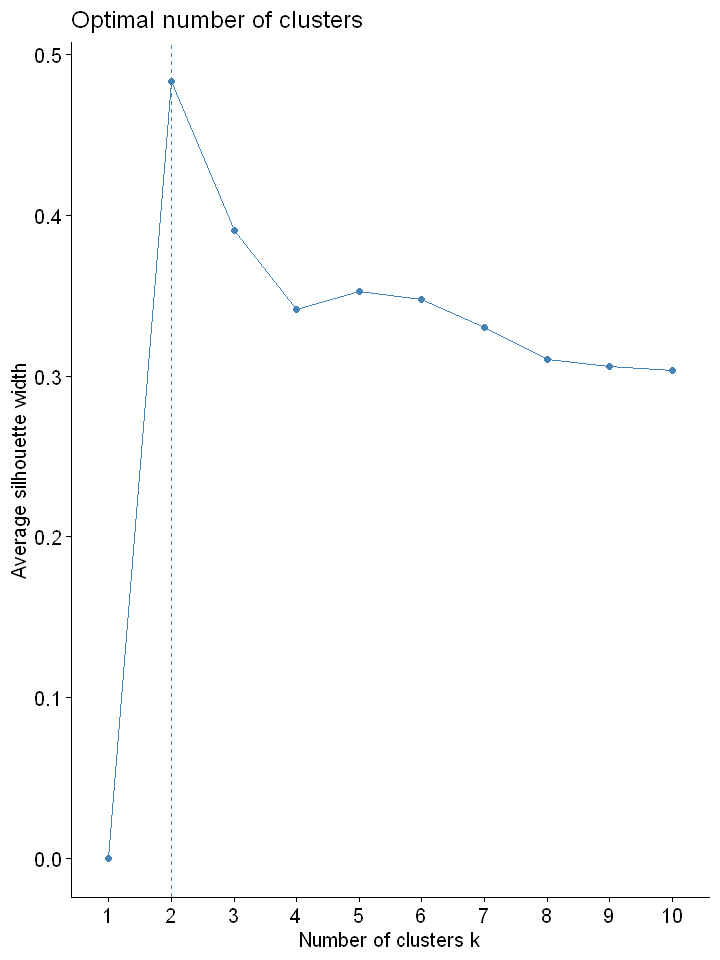

In [75]:
# Silhouette menthod
X_df %>% 
    factoextra::fviz_nbclust(
        FUN = hcut,
        method="silhouette" # Look for maxiumn width
    )

### There are 3 clusters enclosed in 3 different colored boxes. You can also use the color_branches() function from the dendextend library to visualize your tree with different colored branches.

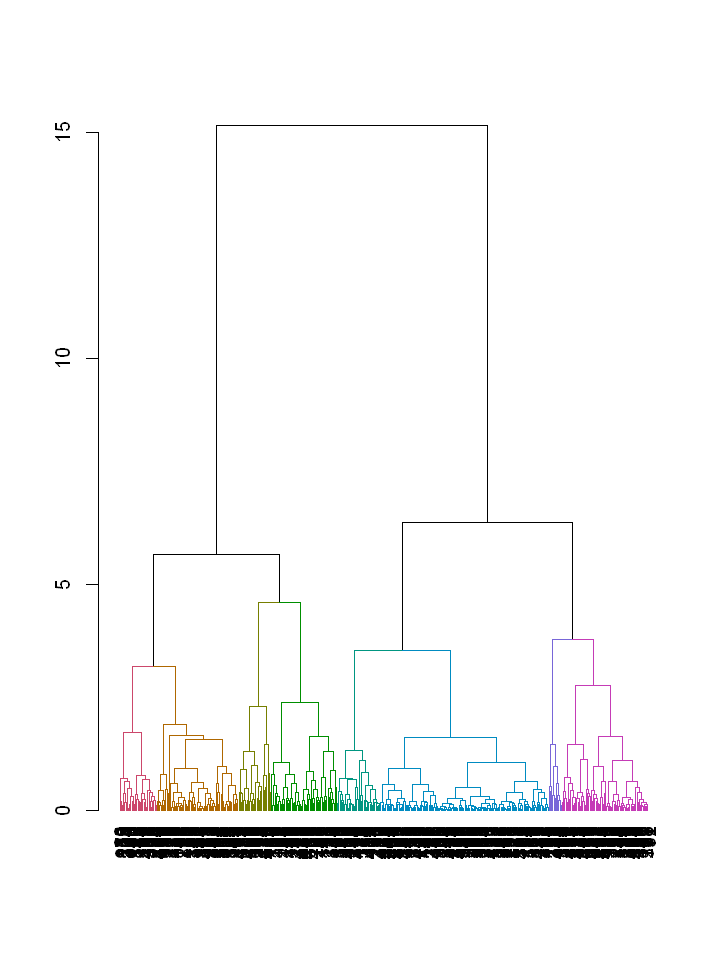

In [76]:

hc <- X_df %>%
    dist %>%
    hclust(method = 'ward.D2')%>% 
    as.dendrogram() %>%
    color_branches(h=3) %>%
    plot()

### Fitting new data points into existing clusters

In [77]:
# Ward's method
hc5 <- X_df %>%
    dist %>%
    hclust(method = "ward.D2" )

# Cut tree into 3 groups
sub_grp <- cutree(hc5, k = 3)

# Number of members in each cluster
table(sub_grp)


sub_grp
  1   2   3 
181  83 176 

In [78]:
df_hc <- rawdata %>% 
    mutate(cluster = sub_grp) #%>%
head(df_hc)

Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
2,3,12669,9656,7561,214,2674,1338,1
2,3,7057,9810,9568,1762,3293,1776,1
2,3,6353,8808,7684,2405,3516,7844,1
1,3,13265,1196,4221,6404,507,1788,2
2,3,22615,5410,7198,3915,1777,5185,3
2,3,9413,8259,5126,666,1795,1451,1


In [79]:
df_hc %>%
    group_by(cluster, Channel)  %>% 
    summarize(n()) %>%  
    dcast(cluster ~ Channel) 

`summarise()` has grouped output by 'cluster'. You can override using the `.groups` argument.
Using n() as value column: use value.var to override.


cluster,1,2
1,69,112
2,79,4
3,150,26


Cluster 1 : High Milk, Grocery,Detergents_Paper
Cluster 2 : High Fresh, Forzen, Deli
Cluster 3 : Low Spenders

https://medium.com/@divya.ganjoo/cluster-analysis-1b0bf834af7f